In [2]:
!pip install pyannote.audio librosa soundfile scipy matplotlib

Noise reduction using FFT complete! Filtered audio saved as Filtered_Audio.wav.


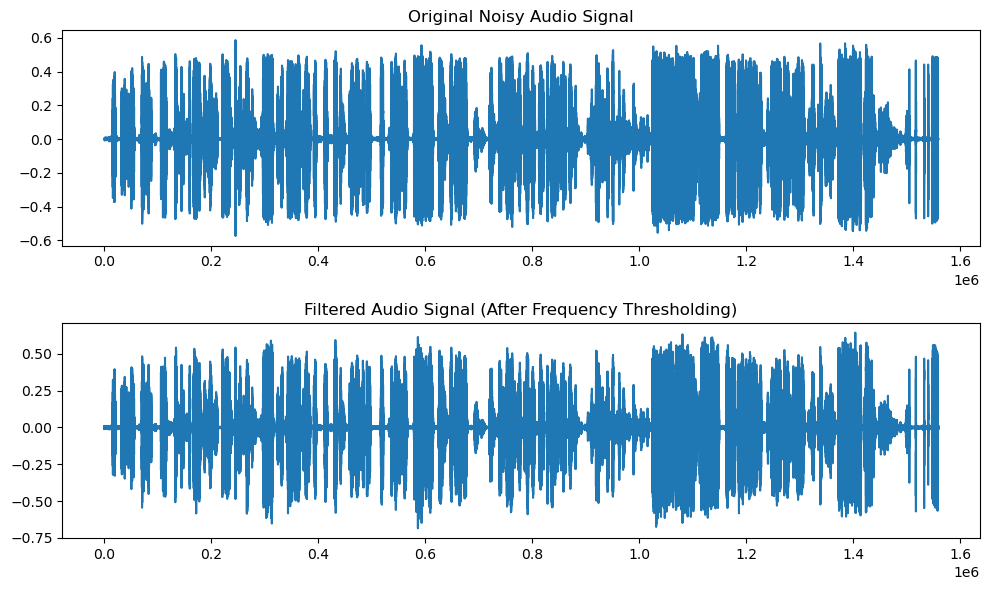

In [6]:
!pip install librosa
!pip install soundfile
!pip install scipy

import numpy as np
import librosa
import soundfile as sf
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Step 1: Provide the file path of the noisy audio
audio_path = r"C:\Users\aksha\Deep Learning Labs\MHA Project\Hindi_Audio_Datasets\archive\911_recordings\call_10.mp3"  # Replace this with your actual file path

# Step 2: Load the noisy audio file using librosa
noisy_audio, sr = librosa.load(audio_path, sr=None)  # sr=None preserves the original sample rate

# Step 3: Perform FFT on the noisy audio signal
fft_audio = fft(noisy_audio)

# Step 4: Frequency thresholding (remove frequencies above 3 kHz)
# Get the frequency bins corresponding to the FFT results
frequencies = np.fft.fftfreq(len(fft_audio), 1/sr)

# Apply a threshold to remove noise above 3 kHz
threshold1 = 3000  # 3 kHz
threshold2 = 250
fft_audio[np.abs(frequencies) > threshold1] = 0
fft_audio[np.abs(frequencies) < threshold2] = 0

# Step 5: Apply inverse FFT to get the filtered audio signal
filtered_audio = np.real(ifft(fft_audio))

# Step 6: Save the filtered audio to a file
output_filename = 'Filtered_Audio.wav'
sf.write(output_filename, filtered_audio, sr)

print(f"Noise reduction using FFT complete! Filtered audio saved as {output_filename}.")

# Optional: Plot the original and filtered signals for visualization
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(noisy_audio)
plt.title('Original Noisy Audio Signal')
plt.subplot(2, 1, 2)
plt.plot(filtered_audio)
plt.title('Filtered Audio Signal (After Frequency Thresholding)')
plt.tight_layout()
plt.show()

In [14]:
import librosa
import numpy as np
import soundfile as sf
from scipy.signal import butter, lfilter

# Step 1: Load the audio file
audio_path = r"C:\Users\aksha\Deep Learning Labs\MHA Project\Hindi_Audio_Datasets\archive\911_recordings\call_10.mp3"
audio, sr = librosa.load(audio_path, sr=None)

# Step 2: Perform pitch tracking
f0, voiced_flag, _ = librosa.pyin(audio, fmin=75, fmax=600, sr=sr, frame_length=2048, hop_length=256)

# Filter to retain only the voiced portions based on pitch tracking
pitch_filtered_audio = np.zeros_like(audio)
for i, voiced in enumerate(voiced_flag):
    if voiced:  # Retain frames with detected pitch only
        frame_start = i * 256
        frame_end = frame_start + 2048
        pitch_filtered_audio[frame_start:frame_end] = audio[frame_start:frame_end]

# Step 3: Define bandpass filter for harmonic filtering
def butter_bandpass(lowcut, highcut, sr, order=5):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, sr, order=5):
    b, a = butter_bandpass(lowcut, highcut, sr, order=order)
    return lfilter(b, a, data)

# Step 4: Apply bandpass filter within the pitch range
# Harmonic filter based on typical human voice range (adjust range if needed)
lowcut, highcut = 75, 3000  # Hz range based on pitch detection limits
harmonic_filtered_audio = apply_bandpass_filter(pitch_filtered_audio, lowcut, highcut, sr)

# Step 5: Amplify the filtered audio by 3X
harmonic_filtered_audio *= 3

# Step 6: Save the amplified filtered audio
output_file = r"C:\Users\aksha\Deep Learning Labs\MHA Project\filtered_pitch_harmonics_audio.wav"
sf.write(output_file, harmonic_filtered_audio, sr)

print(f"Filtered and amplified audio saved to: {output_file}")


Filtered and amplified audio saved to: C:\Users\aksha\Deep Learning Labs\MHA Project\filtered_pitch_harmonics_audio.wav
